# Indian Currency Notes Classification

#### Objective

It is challenging to recognize currencies from different countries, so we aim to solve this problem. Currency recognition systems are based on image analysis entirely, but our system is based on image processing and makes the process automatic, robust, and easy to use. 
To help visually impaired people and small kids identify currency notes using image processing and computer vision.
The system's work compares the images of currency notes to the previously stored images of currency of different countries. 
Our motive is to make them a cheaper and accurate system for the people that can be easily used and give accurate results when recognizing currency notes.
We are up to create a user-friendly application for the recognition of currency. 

### Importance and usefulness:

1. This application will help the visually impaired and kids to know the value of the money by listening to the amount.
2. We can use it in the currency monitoring system. 
3. It will help people to recognize currency from different countries. We aim to help people and kids to solve this problem. 
4. It can also be used as a learning app for kids or helps kids to recognize what amount of note they are getting when they are purchasing anything or they can learn by pointing the camera towards the image of different currency notes.

### Market potential and competitive advantages
As the number of visually impaired people is increasing year by year so they need some stuff that can help them to not fully depend on others. According to WHO report of 2010, globally the number of people of all ages visually impaired is estimated to be 285 million, of whom 39 million are blind. In 2020 globally this number increased to 1 billion people has a vision impairment that could have been prevented or has yet to be addressed. Increase in number shows that there is still a huge gap between consumer and intended product. We have to take a significant step for the betterment of visually impaired.
There has been done some work in this field recently like Microsoft research project Seeing AI which helps in recognizing almost everything whether be it currency, any text or signboard.
Particular to India there has been impressive effort by Indian Institute of Technology Ropar by developing an app Roshni to recognize old and new currency and Reserve Bank of India (RBI) published an app named MANI to recognize denomination of Indian currency.
Ahmedabad based startup Torchit is creating impact in society by coming up with cost-efficient products, the same way we are also intending to help by building cost-effective solution by building a model automatic, robust, and easy to use by training on a large dataset.

### TECHNOLOGY USED
1.   Python
2.   Jupyter Notebook
3. Libraries used<br>
a. Numpy<br>
b. Pandas<br>
c. Sklearn<br>
d. Matplotlib<br>
e. TensorFlow<br>
f. Keras<br>


#### Procedure
1.	Understand Problem Statement and Data 
2.	Load the packages and data 
3.	Defining some functions for processing the image
4.	Defining the CNN Model
5.  Rescaling the Image
6.  Dividing the data and fitting the Model
7.  Plotting Loss and accuracy
8.  Saving the model and Testing the accuracy
 

#### Understand Problem Statement and Data
The first step we will be understanding the problem we want to solve and looking at each column in the dataset to understand them.

#### Problem Statement
Using this dataset, we are going to learn how to train tensorflow model for multi class classification.

#### The Dataset Information:
Types of Indian Currency can be Classified as:
1)Ten Rupee Notes
2)Twenty Rupee Notes
3)Fifty Rupee Notes
4)Hundred Rupee Notes
5)Two Hundred Rupee Notes
6)Five Hundred Rupee Notes, and,
7)Two Thousand Rupee Notes.


# Importing the libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense,Dropout,Activation,Flatten
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'image/training'
valid_path = 'image/validation'

In [3]:
# useful for getting number of output classes
folders = glob('image/training/*')

In [4]:
folders

['image/training\\10',
 'image/training\\100',
 'image/training\\20',
 'image/training\\200',
 'image/training\\2000',
 'image/training\\50',
 'image/training\\500']

### Some useful functions

In [5]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint


# For reading the image as it is
def read_img(file_name):
    img = cv2.imread(file_name)
    return img


# resizing image with fixed aspect ratio
def resize_img(image, scale):
    res = cv2.resize(image, None, fx=scale, fy=scale, interpolation = cv2.INTER_AREA)
    return res


# convert image into grayscale
def img_to_gray(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return img_gray


#  blurred grayscale
def img_to_gaussian_gray(image):
    img_gray = cv2.GaussianBlur(img_to_gray(image), (5, 5), 0)
    return img_gray


# convert image to negative
def img_to_neg(image):
    img_neg = 255 - image
    return img_neg


# binarize (threshold)
def binary_thresh(image, threshold):
    retval, img_thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return img_thresh

def adaptive_thresh(image):
    img_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
    return img_thresh


# sobel edge operator
def sobel_edge(image, align):
    img_horiz = cv2.Sobel(image, cv2.CV_8U, 0, 1)
    img_vert = cv2.Sobel(image, cv2.CV_8U, 1, 0)
    if align == 'h':
        return img_horiz
    elif align == 'v':
        return img_vert
    else:
        print('use h or v')


# sobel edge x + y
def sobel_edge2(image):
    # ksize = size of extended sobel kernel
    grad_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3, borderType = cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3, borderType = cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    dst = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return dst


# edge operator
def canny_edge(image, block_size, ksize):
    img = cv2.Canny(image, block_size, ksize)
    return img



# detect countours
def find_contours(image):
    (_, contours, _) = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    return contours


# median blur
def median_blur(image):
    blurred_img = cv2.medianBlur(image, 3)
    return blurred_img


# dialte image to close lines
def dilate_img(image):
    img = cv2.dilate(image, np.ones((5,5), np.uint8))
    return img


# erode image
def close(image):
    img = cv2.Canny(image, 75, 300)
    img = cv2.dilate(img, None)
    img = cv2.erode(img, None)
    return img


def harris_edge(image):
    img_gray = np.float32(image)
    corners = cv2.goodFeaturesToTrack(img_gray, 4, 0.03, 200, None, None, 2,useHarrisDetector=True, k=0.04)
    corners = np.int0(corners)

    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (x, y), 3, 255, -1)
    return image

### Defining the CNN sequential model and its layer

In [6]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

### Summary of the model 
Looking into the layers of the model

In [7]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9

### Compiling the model
We are going to use categorical crossentropy as loss function, adam as optimizer and accuracy is going to be used as metrics.

In [8]:

Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Use the Image Data Generator to import the images from the dataset

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

### Making sure you provide the same target size as initialied for the image size

In [10]:
training_set = train_datagen.flow_from_directory('image/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3488 images belonging to 7 classes.


In [11]:
test_set = test_datagen.flow_from_directory('image/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


### Fitting the model

In [12]:
from PIL import _imaging
from PIL import Image
import PIL

r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.


D:\Applications\Anaconda3\envs\py\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2
109/109 [==============================] - 179s 2s/step - loss: 2.2030 - accuracy: 0.2076 - val_loss: 1.6004 - val_accuracy: 0.3841
Epoch 2/2
109/109 [==============================] - 176s 2s/step - loss: 1.5000 - accuracy: 0.4140 - val_loss: 1.1707 - val_accuracy: 0.5429


In [13]:
r.history

{'loss': [2.2029519081115723, 1.5000200271606445],
 'accuracy': [0.20756880939006805, 0.4139908254146576],
 'val_loss': [1.6004128456115723, 1.1706740856170654],
 'val_accuracy': [0.3841269910335541, 0.5428571701049805]}

### Plotting the Loss and Accuracy

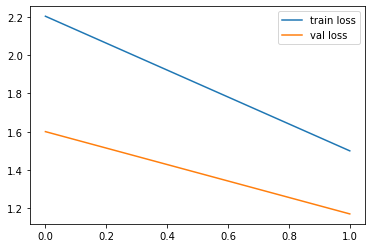

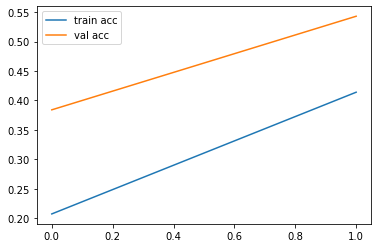

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving the model as a h5 file

In [15]:
from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

### Using the trained model for making prediction over test data

In [16]:
y_pred = Classifier.predict(test_set)

In [17]:
y_pred

array([[6.95388466e-02, 1.68516770e-01, 3.98876011e-01, ...,
        7.48288557e-02, 3.25307436e-02, 3.96443158e-03],
       [1.06232360e-01, 5.63093275e-02, 2.35426158e-01, ...,
        6.87436434e-03, 2.88531154e-01, 1.62486762e-01],
       [1.37561947e-01, 1.13266647e-01, 3.45334291e-01, ...,
        1.01838015e-01, 2.30280831e-01, 1.64849330e-02],
       ...,
       [8.86508450e-03, 6.28902376e-01, 1.20280892e-01, ...,
        4.76496480e-02, 1.75840899e-01, 6.82706421e-04],
       [7.79175619e-03, 1.16733480e-02, 2.87375711e-02, ...,
        5.73078214e-05, 8.27552855e-01, 3.76800336e-02],
       [4.23278805e-04, 8.64675403e-01, 1.98986978e-04, ...,
        1.27915325e-06, 1.23519242e-01, 1.10706529e-02]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 5, 2, 5, 1, 4, 1, 0, 4, 6, 1, 2, 1, 5, 4, 0, 6, 3, 5, 5, 4, 5,
       6, 4, 5, 2, 4, 6, 4, 3, 5, 6, 1, 6, 6, 3, 3, 4, 3, 5, 5, 6, 6, 5,
       4, 5, 6, 4, 4, 5, 5, 5, 5, 4, 6, 6, 4, 5, 5, 3, 6, 5, 3, 6, 4, 5,
       3, 0, 4, 3, 5, 6, 1, 2, 2, 3, 1, 6, 4, 2, 3, 6, 5, 2, 4, 4, 6, 4,
       5, 3, 1, 5, 5, 6, 4, 5, 5, 4, 3, 6, 5, 1, 5, 1, 6, 1, 5, 1, 0, 1,
       5, 3, 3, 2, 4, 5, 3, 4, 3, 6, 4, 5, 5, 4, 4, 5, 5, 3, 5, 4, 6, 3,
       5, 1, 6, 5, 5, 5, 5, 5, 5, 3, 6, 3, 5, 4, 3, 5, 2, 0, 5, 1, 5, 3,
       5, 6, 4, 5, 1, 1, 5, 4, 5, 0, 3, 3, 5, 3, 4, 5, 6, 5, 6, 3, 1, 5,
       3, 2, 2, 6, 2, 4, 5, 4, 4, 5, 4, 6, 3, 4, 5, 6, 1, 0, 0, 5, 1, 5,
       6, 1, 6, 1, 1, 1, 1, 6, 4, 4, 3, 4, 4, 3, 1, 2, 6, 5, 5, 5, 5, 1,
       0, 1, 4, 1, 3, 1, 5, 2, 6, 1, 1, 0, 1, 4, 0, 3, 1, 2, 4, 5, 1, 4,
       5, 5, 3, 3, 3, 4, 4, 6, 6, 5, 1, 3, 6, 5, 5, 6, 5, 6, 3, 2, 3, 5,
       5, 4, 4, 5, 6, 5, 6, 5, 2, 6, 6, 5, 1, 5, 6, 5, 3, 5, 2, 4, 3, 4,
       5, 4, 1, 3, 1, 0, 5, 1, 6, 5, 5, 6, 1, 4, 6,